In [209]:
import string
from collections import Counter
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import seaborn as sns
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [210]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [211]:
df.shape

(5572, 5)

In [212]:
#------------------- Data Cleaning ----------------------

In [213]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [214]:
df.sample(5)

,v1,v2
2174,ham,See? I thought it all through
308,spam,TheMob> Check out our newest selection of cont...
2744,ham,"Tick, tick, tick ... Babe"
382,ham,Hey leave it. not a big deal:-) take care.
3201,ham,Okay lor... Wah... like that def they wont let...


In [215]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [216]:
encoder = LabelEncoder()

In [217]:
df['target'] = encoder.fit_transform(df['target'])

In [218]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [219]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [220]:
df.duplicated().sum()

np.int64(403)

In [221]:
df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(403)

In [222]:
df.shape

(5572, 2)

In [223]:
#--------------- EDA ------------------------

In [224]:
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

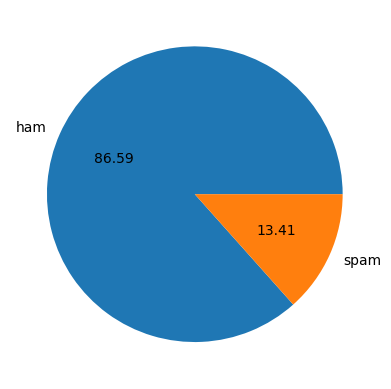

In [225]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [226]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [227]:
df['num_words'] = df['text'].apply(lambda text : len(nltk.word_tokenize(text)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [228]:
df['num_sentences'] = df['text'].apply(lambda text: len(nltk.sent_tokenize(text)))
df = df[['target', 'text', 'num_characters', 'num_words', 'num_sentences']]
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [229]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [230]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [231]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

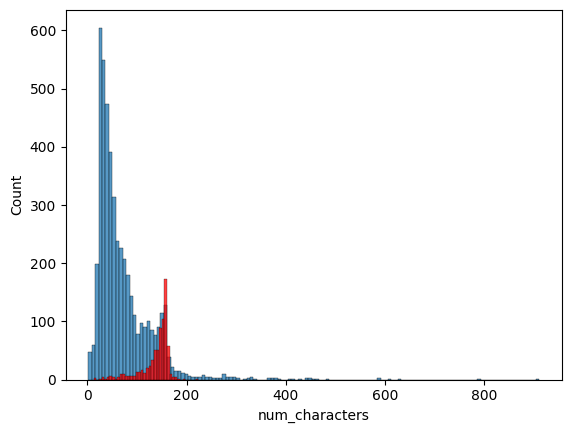

In [232]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

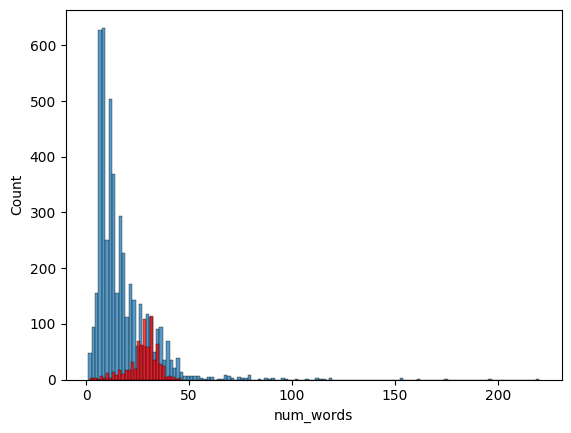

In [233]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

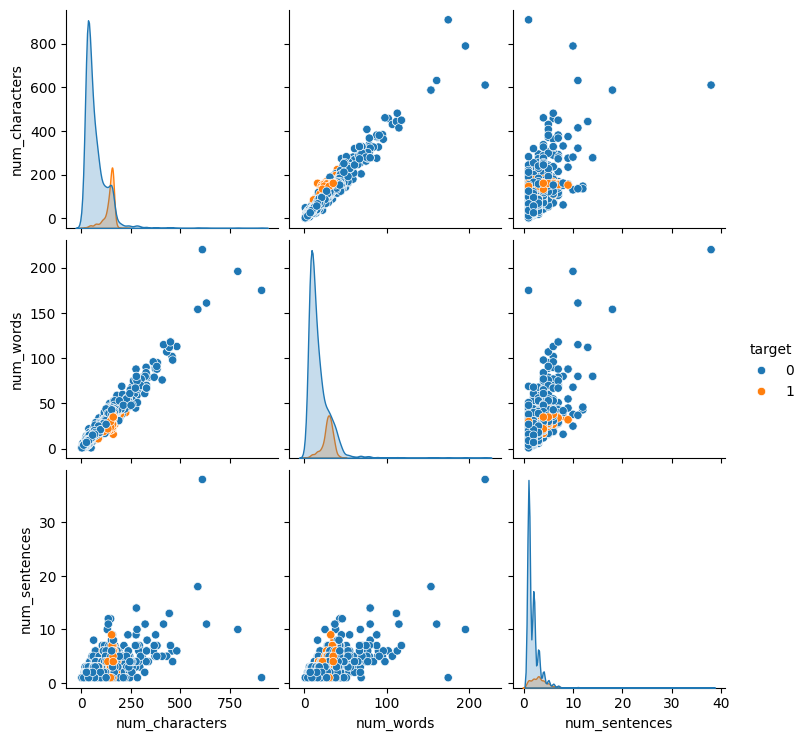

In [234]:
sns.pairplot(df, hue='target')

<Axes: >

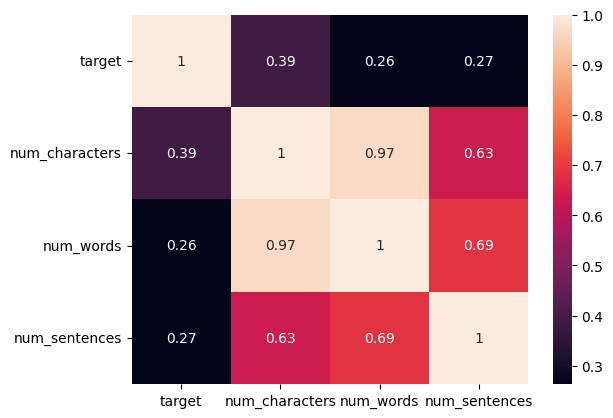

In [235]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [236]:
#------------------- Data Preprocessing ---------------------------

In [237]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords_list and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [238]:
print(transform_text('I love Youtube Lectures on Machines Learning. How about You?'))

love youtub lectur machin learn


In [239]:
df['transformed_text'] = df['text'].apply(transform_text)

In [240]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [241]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

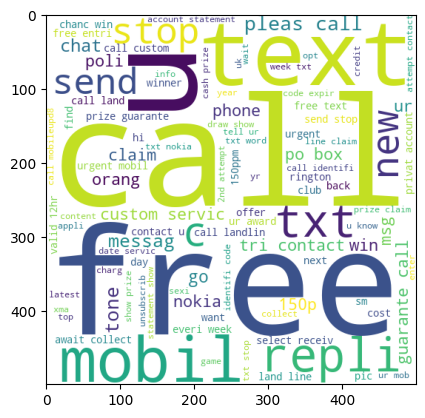

In [242]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

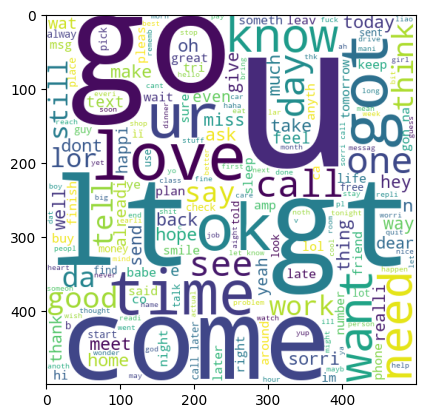

In [243]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

In [244]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

print(len(spam_corpus))

11490


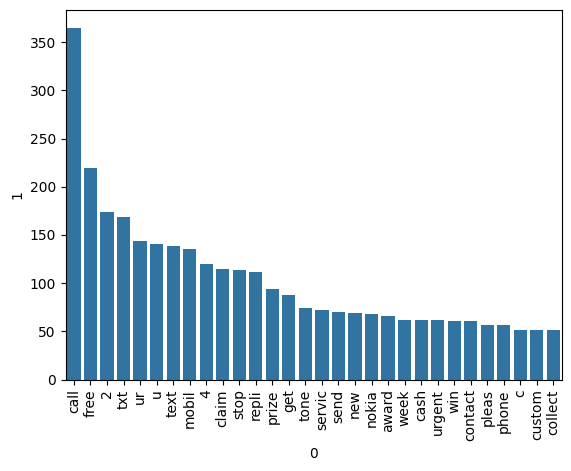

In [245]:
mcdf = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=mcdf[0], y=mcdf[1])
plt.xticks(rotation='vertical')
plt.show()

In [246]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

print(len(ham_corpus))

38221


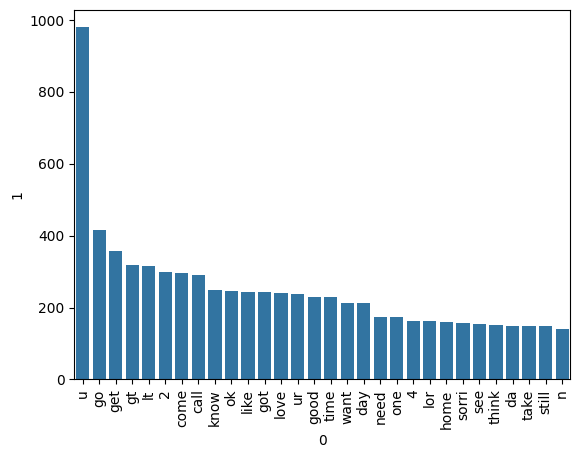

In [247]:
mcdf = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=mcdf[0], y=mcdf[1])
plt.xticks(rotation='vertical')
plt.show()

In [248]:
#--------------------- Model Building ------------------------

In [267]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [268]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5572, 6708))

In [269]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5572,))

In [270]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [271]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [272]:
gnb.fit(X_train, Y_train)
Y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_gnb))
print(confusion_matrix(Y_test, Y_pred_gnb))
print(precision_score(Y_test, Y_pred_gnb))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [273]:
mnb.fit(X_train, Y_train)
Y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_mnb))
print(confusion_matrix(Y_test, Y_pred_mnb))
print(precision_score(Y_test, Y_pred_mnb))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [274]:
bnb.fit(X_train, Y_train)
Y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_bnb))
print(confusion_matrix(Y_test, Y_pred_bnb))
print(precision_score(Y_test, Y_pred_bnb))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [281]:
#-------- FINAL TESTING -----------
mail = """
Dear Customer,

We’ve detected unusual activity on your account and need you to verify your identity immediately. If you do not act within the next 24 hours, your account may be permanently suspended!

Click here to verify your account: [suspicious link]

Please don’t delay. This is a critical security issue.

Regards,
Account Support Team
"""

transformed_mail = transform_text(mail)
vector_mail = tfidf.transform([transformed_mail])
output = bnb.predict(vector_mail)
print(output)

[1]
